In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from random import random, randint
from statistics import mode, StatisticsError
from PIL import Image
from io import BytesIO

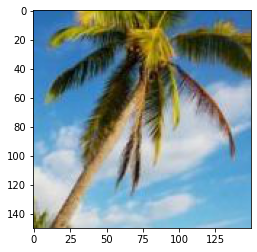

In [4]:
image = Image.open('test.jpg') # Open Image
plt.imshow(image)

In [5]:
pix = image.load()      # Check dimensions and pixel values
print(image.size) 
print(pix[image.size[0] - 1, image.size[1] - 1])
pix[image.size[0] - 1, image.size[1] - 1][0]

(150, 150)
(117, 185, 220)


117

# Grayscale the Given Picture

In [6]:
def turnGray(image):        # takes in image, returns 3D array with grayscale matrix and
    pix = image.load();            # corresponding rgb value in original picture
    height = image.size[1];
    width = image.size[0];
    rgb = np.zeros((height, width, 3));
    gray = np.empty([height, width], dtype=np.uint8);
    for i in range(height):
        for j in range(width):
            rgb[i][j][0] = pix[j, i][0];
            rgb[i][j][1] = pix[j, i][1];
            rgb[i][j][2] = pix[j, i][2];
            gray[i][j] = 0.21*pix[j, i][0] + 0.72*pix[j, i][1] + 0.07*pix[j, i][2]; # grayscale formula
    return rgb, gray
    

(150, 150, 3)

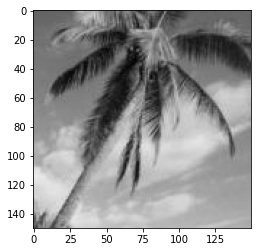

In [7]:
rgb, gray = turnGray(image)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
rgb.shape

In [8]:
rgbtrain = rgb[:, 0:int(rgb.shape[1]/2)];          #set up training and testing datasets
graytrain = gray[:, 0:int(gray.shape[1]/2)];
graytest = gray[:, int(gray.shape[1]/2):gray.shape[1]];
rgbtest = rgb[:, int(rgb.shape[1]/2):rgb.shape[1]];

# Logistic Model Training

In [9]:
def trainLogistic(graytrain, rgbtrain):     # takes in gray scale matrix as inputs  
    b = np.ones((3));                       # and corresponding rgb values to be used as outputs
    
    loss_min_r = float('inf');        # for r, find beta by minimizing loss function
    beta = 0;
    loss_temp_r = 0;
    while(beta < 0.1):
        beta = beta + 0.001;          # taking steps of 0.001 each time
        loss_temp_r = 0;
        for i in range(graytrain.shape[0]):
            for j in range(graytrain.shape[1]):
                y_est = 255/(1 + math.exp(-beta*(graytrain[i][j] - 127.5))); # logistic regression equation
                y_act = rgbtrain[i][j][0];
                loss_temp_r = math.pow((y_act - y_est), 2);
        if loss_temp_r < loss_min_r:
            b[0] = beta;
            loss_min_r = loss_temp_r;

    # Requires 3 models, one for each color
    loss_min_g = float('inf');        # for g, find beta by minimizing loss function
    beta = 0;
    loss_temp_g = 0;
    while(beta < 0.1):
        beta = beta + 0.001;
        loss_temp_g = 0;
        for i in range(graytrain.shape[0]):
            for j in range(graytrain.shape[1]):
                y_est = 255/(1 + math.exp(-beta*(graytrain[i][j] - 127.5)));
                y_act = rgbtrain[i][j][1];
                loss_temp_g = math.pow((y_act - y_est), 2);
        if loss_temp_g < loss_min_g:
            b[1] = beta;
            loss_min_g = loss_temp_g;
    
    loss_min_b = float('inf');        # for b, find beta by minimizing loss function
    beta = 0;
    loss_temp_b = 0;
    while(beta < 0.1):
        beta = beta + 0.001;
        loss_temp_b = 0;
        for i in range(graytrain.shape[0]):
            for j in range(graytrain.shape[1]):
                y_est = 255/(1 + math.exp(-beta*(graytrain[i][j] - 127.5)));
                y_act = rgbtrain[i][j][2];
                loss_temp_b = math.pow((y_act - y_est), 2);
        if loss_temp_b < loss_min_b:
            b[2] = beta;
            loss_min_b = loss_temp_b;
    
    return b;                        # returns the beta values for each color - r, g, b

In [10]:
b = trainLogistic(graytrain, rgbtrain);  
b

array([0.01 , 0.019, 0.027])

# R,G,B Values and Their Adopted Curves 

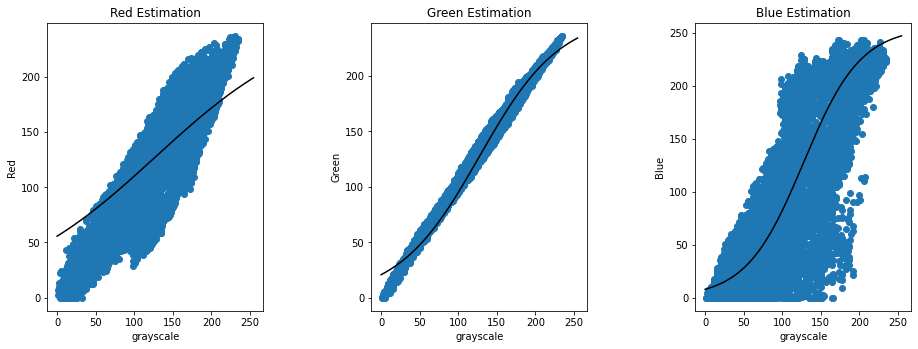

In [11]:
# The values of each color are plotted in a scatterplot and the logistic curve that was found is shown

x_plot = np.arange(0, 255, 0.5);
y_predict_r_plot = np.zeros((x_plot.shape));
y_predict_g_plot = np.zeros((x_plot.shape));
y_predict_b_plot = np.zeros((x_plot.shape));
for i in range(x_plot.shape[0]):
    y_predict_r_plot[i] = 255/(1 + math.exp(-b[0]*(x_plot[i] - 127.5)));
    y_predict_g_plot[i] = 255/(1 + math.exp(-b[1]*(x_plot[i] - 127.5)));
    y_predict_b_plot[i] = 255/(1 + math.exp(-b[2]*(x_plot[i] - 127.5)));
    
x_training_plot = np.zeros((graytrain.shape[0]*graytrain.shape[1]));
y_training_r_plot = np.zeros((rgbtrain.shape[0]*rgbtrain.shape[1]));
y_training_g_plot = np.zeros((rgbtrain.shape[0]*rgbtrain.shape[1]));
y_training_b_plot = np.zeros((rgbtrain.shape[0]*rgbtrain.shape[1]));

k = 0;
for i in range(graytrain.shape[0]):
    for j in range(graytrain.shape[1]):
        x_training_plot[k] = graytrain[i][j];
        y_training_r_plot[k] = rgbtrain[i][j][0];
        y_training_g_plot[k] = rgbtrain[i][j][1];
        y_training_b_plot[k] = rgbtrain[i][j][2];
        k = k + 1;

plt.subplot(131)                 # make plot for R
plt.scatter(x_training_plot, y_training_r_plot, marker = 'o');
plt.plot(x_plot, y_predict_r_plot, color = 'black');
plt.xlabel("grayscale");
plt.ylabel("Red");
plt.title("Red Estimation");

plt.subplot(132)                 # make plot for G
plt.scatter(x_training_plot, y_training_g_plot, marker = 'o');
plt.plot(x_plot, y_predict_g_plot, color = 'black');
plt.xlabel("grayscale");
plt.ylabel("Green");
plt.title("Green Estimation");

plt.subplot(133)                 # make plot for B
plt.scatter(x_training_plot, y_training_b_plot, marker = 'o');
plt.plot(x_plot, y_predict_b_plot, color = 'black');
plt.xlabel("grayscale");
plt.ylabel("Blue");
plt.title("Blue Estimation");

plt.subplots_adjust(0, 0, 2, 1, 0.5, 0.5)

# Prediction With Model

In [12]:
def testLogistic(graytest, b):           # given grayscale matrix and beta values, predict r, g, b value
    rgbtemp = np.ones((graytest.shape[0], graytest.shape[1], 3));
    for i in range(rgbtemp.shape[0]):
        for j in range(rgbtemp.shape[1]):
            rgbtemp[i][j][0] = 255/(1 + math.exp(-b[0]*(graytest[i][j] - 127.5))); # plug numbers into logistic eq 
            rgbtemp[i][j][1] = 255/(1 + math.exp(-b[1]*(graytest[i][j] - 127.5)));
            rgbtemp[i][j][2] = 255/(1 + math.exp(-b[2]*(graytest[i][j] - 127.5)));
    return rgbtemp;

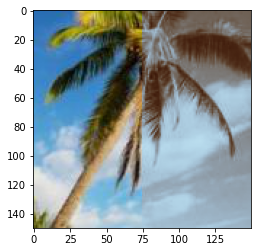

In [13]:
rgbtemp = testLogistic(graytest, b);

rgbfinal = rgb.copy();       # Change the right side of the picture to the r, g, b values predicted by model
for i in range(gray.shape[0]):
    for j in range(int(gray.shape[1]/2), gray.shape[1]):
        rgbfinal[i][j][0] = rgbtemp[i][j - int(gray.shape[1]/2)][0];
        rgbfinal[i][j][1] = rgbtemp[i][j - int(gray.shape[1]/2)][1];
        rgbfinal[i][j][2] = rgbtemp[i][j - int(gray.shape[1]/2)][2];

data = rgbfinal.astype('uint8');
plt.imshow(data);

# Loss and MSE Calculations

In [14]:
loss_final = np.zeros((3));

for i in range(rgbtemp.shape[0]):       # Calculates the loss / error 
    for j in range(rgbtemp.shape[1]):
        loss_final[0] = loss_final[0] + math.pow(rgbtemp[i][j][0] - rgbtest[i][j][0], 2);
        loss_final[1] = loss_final[1] + math.pow(rgbtemp[i][j][1] - rgbtest[i][j][1], 2);
        loss_final[2] = loss_final[2] + math.pow(rgbtemp[i][j][2] - rgbtest[i][j][2], 2);

loss_final

array([12771390.06304787,   468674.39576619, 21481845.56306675])

In [16]:
n = rgbtest.shape[0]*rgbtest.shape[1]      # Calculates MSE
print("MSE - R: " + str(loss_final[0]/n) + ", G: " + str(loss_final[1]/n) + ", B: " + str(loss_final[2]/n))

MSE - R: 1135.2346722709215, G: 41.65994629032804, B: 1909.4973833837116
